# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Linear Regression
* Polynomial
* degrees=1,4,6
* mean_squared_error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
np.random.seed(0)

In [2]:
n_samples = 40
degrees = [1, 4, 16]

true_fun = lambda X: 3*X**3+5*X**2+0.5*X+20
X = np.sort(np.random.rand(n_samples))
#https://www.jianshu.com/p/214798dd8f93
y = true_fun(X)+np.random.rand(n_samples)
X = X.reshape((-1,1))
# X = X[:, np.newaxis]
# X = X[:, None]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def Polynomial(X, degree, include_bias=False):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = polynomial_features.fit_transform(X)
    return X_poly
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Degree =  0
Coefficients: 
 [8.06751454]
MSE of train with degree  1: 0.73310
MSE of test with degree  1: 0.54463


Degree =  1
Coefficients: 
 [  6.51270233 -26.30237012  55.33981389 -27.32558967]
MSE of train with degree  4: 0.05734
MSE of test with degree  4: 0.10025


Degree =  2
Coefficients: 
 [ 3.49316710e+02 -1.70476705e+04  5.11919209e+05 -9.42729307e+06
  1.07536628e+08 -7.94434107e+08  3.98448587e+09 -1.40673365e+10
  3.57991664e+10 -6.64810834e+10  9.02198459e+10 -8.85311915e+10
  6.11742343e+10 -2.82375797e+10  7.81679440e+09 -9.81506226e+08]
MSE of train with degree 16: 0.02854
MSE of test with degree 16: 3.18093




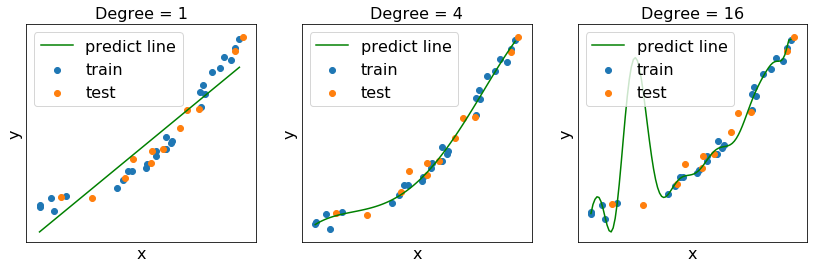

In [8]:
fontsize = 16
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize

plt.figure(figsize=(14, 4))

for i in range(len(degrees)):   
    XX_train = Polynomial(X_train, degree=degrees[i], include_bias=False)
    XX_test = Polynomial(X_test, degree=degrees[i], include_bias=False)
    model = LinearRegression()
    model.fit(XX_train, y_train)
    print('Degree = ', i)
    # estimate coefficients
    print('Coefficients: \n', model.coef_)
    y_train_pred = model.predict(XX_train)
    y_test_pred = model.predict(XX_test)
    # mean squared error
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)
    print("MSE of train with degree {:2d}: {:6.5f}".format(degrees[i], MSE_train))
    print("MSE of test with degree {:2d}: {:6.5f}".format(degrees[i], MSE_test))
    print('\n')
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    #http://bigsec.net/b52/scipydoc/matplotlib_intro.html
    X_plt = np.linspace(min(X_train), max(X_train), 100).reshape((-1, 1))
    XX_plt = Polynomial(X_plt, degree=degrees[i], include_bias=False)
    y_plt_pred = model.predict(XX_plt)
    plt.plot(X_plt, y_plt_pred, 'g-', label="predict line")
    plt.scatter(X_train, y_train, label="train")
    plt.scatter(X_test, y_test, label="test")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.xlim((0, 1))
    # plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree = %d" % degrees[i], fontsize=16)
plt.show()

# Stock Price Prediction 1
* Linear Regression、Ridge Regression、Lasso Regression
* Polynomial
* Degrees=1
* Mean_absolute_error、R2_score
* Scaler: MinMaxScaler

In [9]:
import numpy as np 
import pandas as pd 
import pandas_datareader as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [10]:
fontsize = 14
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize

def plot_target_pred(y, y_pred, target_next):
    plt.figure()
    target_next_pred = target_next+'_pred'
    plt.plot(y, 'b-', label=target_next)
    plt.plot(y_pred, 'r-.', label=target_next_pred)
    plt.legend()
    plt.figure()
    target_next_pred = target_next+'_pred'
    plt.plot(y, y_pred, '.')
    plt.xlabel(target_next)
    plt.ylabel(target_next_pred)
    plt.legend()
    plt.show()    

In [11]:
ticker = '^GSPC'
start = '2005-01-01'
end = '2017-12-31'
df = web.data.DataReader(ticker, 'yahoo', start, end)
df = df.drop(['Adj Close'], axis=1)

In [12]:
df['High_Close_Change'] = (df['High']-df['Close'])/df['Close']
df['Close_Open_Change'] = (df['Close']-df['Open'])/df['Open']

In [13]:
# defining target and features for regression
target = 'Close'
target_PctChange = target+'_PctChange'
df[target_PctChange] = df[target].pct_change()
    
features = ['Open', 'High', 'Low', 'Close', 'Volume']
features = ['High_Close_Change', 'Close_Open_Change', 'Close', 'Volume', target_PctChange]
df = df[features]

In [14]:
# Features
# features = list(df.columns[~df.columns.isin([target_next])])
features = df.columns
lag = 30
for i in range(1,lag+1):
    for feature in features:
        df[feature+"_lag"+str(i)] = df[feature].shift(i)
    
shift = -10
target_next = target+'_next'+str(-shift)
df[target_next] = df[target].shift(shift)
df = df.dropna()

In [15]:
X = df.drop([target_next], axis=1)
y = df[target_next]

In [16]:
def Polynomial(X, degree, include_bias=False, interaction_only=True):
    polynomial_features = PolynomialFeatures(degree=degree, 
                                             include_bias=False, 
                                             interaction_only=True)
    X_polynomial = polynomial_features.fit_transform(X)
    return X_polynomial

degree = 1
X = Polynomial(X, degree=degree, include_bias=False, interaction_only=True)

In [17]:
# Create training and testing data sets.
train_size = 0.8
N = X.shape[0]
Num_train = int(N*train_size)

X_train, y_train = X[:Num_train], y[:Num_train]
X_test, y_test = X[Num_train:], y[Num_train:]
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [18]:
scalerType = True
if scalerType:
    scaler = MinMaxScaler()
    scaler_fit = scaler.fit(X_train)
    XX_train = scaler_fit.transform(X_train)
    XX_test = scaler_fit.transform(X_test)

In [20]:
model = LinearRegression()
model = Ridge()
model = Lasso(alpha=0.1)
model.fit(XX_train, y_train)

dir(model)
intercept = model.intercept_
coefs = model.coef_
np.sum((coefs!= 0))
model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [21]:
model.score(XX_test, y_test)

0.9509059496135427

In [23]:
target_next_pred = target_next+'_pred'
y_train_df[target_next_pred] = model.predict(XX_train)
y_test_df[target_next_pred] = model.predict(XX_test)

"""
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

metrics.explained_variance_score(y_true, y_pred)   Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	       Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	   Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	   Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	   Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	           R^2 (coefficient of determination) regression score function.
"""
MAE_train = metrics.mean_absolute_error(y_train_df[target_next], y_train_df[target_next_pred])
MAE_test = metrics.mean_absolute_error(y_test_df[target_next], y_test_df[target_next_pred])
print(MAE_test)


33.76769448379866


C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


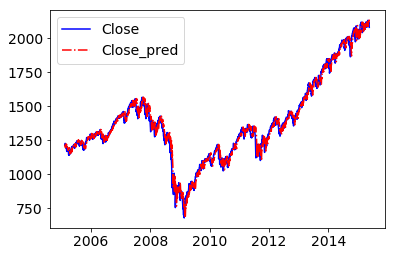

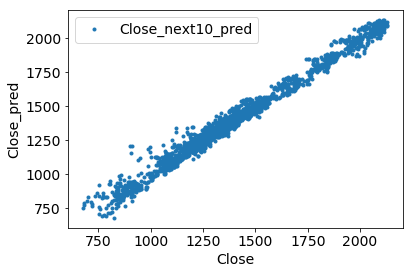

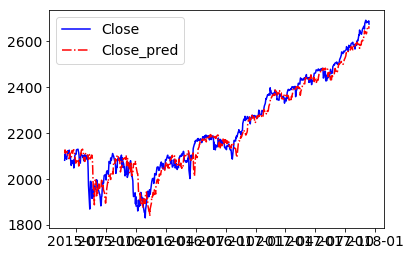

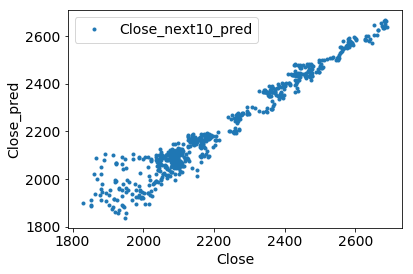

In [24]:
plot_target_pred(y_train_df[target_next], y_train_df[target_next_pred], target)
plot_target_pred(y_test_df[target_next], y_test_df[target_next_pred], target)
#dataframe畫圖index會變成x座標

# Stock Price Prediction 2
* Linear Regression、Ridge Regression、Lasso Regression
* Polynomial
* Degrees=1
* Mean_absolute_error、R2_score
* Scaler: MinMaxScaler
* Adding 'VIX'

In [25]:
# https://www.kaggle.com/shivinder/google-stock-pricing-prediction-using-regression
"""
pip install pandas_datareader

若出現錯誤訊息：
from pandas.core.common import is_list_like
ImportError: cannot import name 'is_list_like'
=>
將 \Lib\site-packages\pandas_datareader\fred.py 中的
from pandas.core.common import is_list_like
修改為
from pandas.api.types import is_list_like

或
cmd
=>
pip uninstall pandas_datareader
=>
pip install pandas_datareader
"""

"\npip install pandas_datareader\n\n若出現錯誤訊息：\nfrom pandas.core.common import is_list_like\nImportError: cannot import name 'is_list_like'\n=>\n將 \\Lib\\site-packages\\pandas_datareader\x0cred.py 中的\nfrom pandas.core.common import is_list_like\n修改為\nfrom pandas.api.types import is_list_like\n\n或\ncmd\n=>\npip uninstall pandas_datareader\n=>\npip install pandas_datareader\n"

In [26]:
import numpy as np 
import pandas as pd 
import pandas_datareader as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [27]:
fontsize = 14
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize

def plot_target_pred(y, y_pred, target_next):
    plt.figure()
    target_next_pred = target_next+'_pred'
    plt.plot(y, 'b-', label=target_next)
    plt.plot(y_pred, 'r-.', label=target_next_pred)
    plt.legend()
    plt.figure()
    target_next_pred = target_next+'_pred'
    plt.plot(y, y_pred, '.')
    plt.xlabel(target_next)
    plt.ylabel(target_next_pred)
    plt.legend()
    plt.show()

In [28]:
tickers = ['^GSPC', '^VIX']
start = '2005-01-01'
end = '2017-12-31'
df = web.data.DataReader(tickers, 'yahoo', start, end)
df = df.drop(['Adj Close'], axis=1)

In [29]:
High_Close_Change0 = ('High_Close_Change', tickers[0])
High_Close_Change1 = ('High_Close_Change', tickers[1])
Close_Open_Change0 = ('Close_Open_Change', tickers[0])
Close_Open_Change1 = ('Close_Open_Change', tickers[1])
df[[High_Close_Change0, High_Close_Change1]] = (df['High']-df['Close'])/df['Close']
df[[Close_Open_Change0, Close_Open_Change1]] = (df['Close']-df['Open'])/df['Open']

In [30]:
# defining target and features for regression
target = ('Close', '^GSPC')
target_PctChange = (target[0]+'_PctChange', '^GSPC')
df[target_PctChange] = df[target].pct_change()

In [31]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
features = [High_Close_Change0, High_Close_Change1, Close_Open_Change0, Close_Open_Change1, target_PctChange]
df = pd.concat([df['Close'], df[features]], axis=1)

In [32]:
# Features
#features = list(df.columns[~df.columns.isin([target_next])])
features = df.columns
#print(features)
lag = 30
for i in range(1,lag+1):
    for feature in features:
        if (len(feature) == 2):
            feature_lag = feature[0]+'_'+feature[1]+"_lag"+str(i)
        else:
            feature_lag = feature+"_lag"+str(i)
        df[feature_lag] = df[feature].shift(i)
    
target = target[1]
shift = -10
target_next = (target[0]+'_next'+str(-shift), '^GSPC')
target_next_pred = (target[0]+'_next_pred'+str(-shift), '^GSPC')
df[target_next] = df[target].shift(shift)
df = df.dropna()

In [33]:
X = df.drop([target_next], axis=1)
y = df[target_next]

In [34]:
def Polynomial(X, degree, include_bias=False, interaction_only=True):
    polynomial_features = PolynomialFeatures(degree=degree, 
                                             include_bias=False, 
                                             interaction_only=True)
    X_polynomial = polynomial_features.fit_transform(X)
    return X_polynomial

degree = 1
X = Polynomial(X, degree=degree, include_bias=False, interaction_only=True)

In [35]:
# Create training and testing data sets.
train_size = 0.8
N = X.shape[0]
Num_train = int(N*train_size)

X_train, y_train = X[:Num_train], y[:Num_train]
X_test, y_test = X[Num_train:], y[Num_train:]
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [36]:
scalerType = True
if scalerType:
    scaler = MinMaxScaler()
    scaler_fit = scaler.fit(X_train)
    XX_train = scaler_fit.transform(X_train)
    XX_test = scaler_fit.transform(X_test)

In [37]:
model = LinearRegression()
model = Ridge()
model = Lasso(alpha=0.1)
model.fit(XX_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
dir(model)
intercept = model.intercept_
coefs = model.coef_
np.sum((coefs != 0))
model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [39]:
model.score(XX_train, y_train)
model.score(XX_test, y_test)

0.9512121588541534

In [41]:
y_train_df[target_next_pred] = model.predict(XX_train)
y_test_df[target_next_pred] = model.predict(XX_test)

"""
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

metrics.explained_variance_score(y_true, y_pred)   Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	       Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	   Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	   Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	   Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	           R^2 (coefficient of determination) regression score function.
"""
MAE_train = metrics.mean_absolute_error(y_train_df[target_next], y_train_df[target_next_pred])
MAE_test = metrics.mean_absolute_error(y_test_df[target_next], y_test_df[target_next_pred])
print(MAE_test)

33.64559732038382


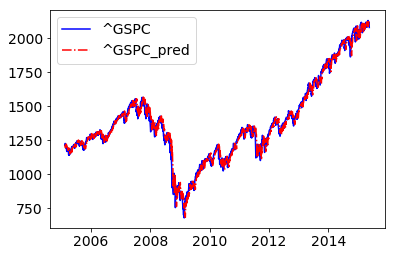

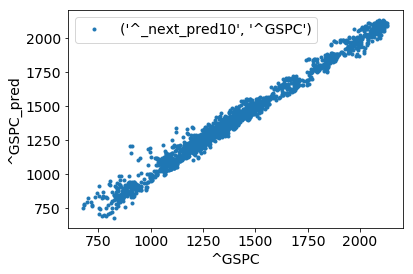

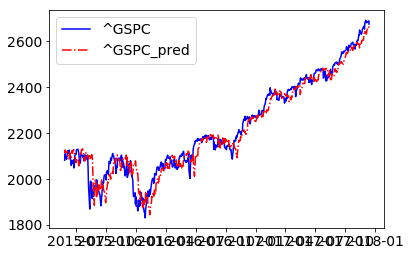

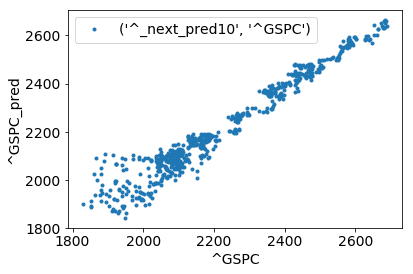

In [42]:
plot_target_pred(y_train_df[target_next], y_train_df[target_next_pred], target)
plot_target_pred(y_test_df[target_next], y_test_df[target_next_pred], target)

# Stock Price Prediction 3
* Linear Regression、Ridge Regression、Lasso Regression、Decision Tree Regressor
* Polynomial
* Degrees=1
* Mean_absolute_error、R2_score
* Unscaler & Scaler: MinMaxScaler、StandardScaler()
* TALib
* make_pipeline

In [43]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import talib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
#https://www.ricequant.com/community/topic/174/

In [44]:
def TALib(df, target):
    # Add the five day moving average technical indicator.
    df['MA_5'] = talib.MA(df[target], timeperiod=5, matype=0)
    # df['MA_5'] = talib.MA(df[target].values, timeperiod=5, matype=0)
    # Add the twenty day moving average technical indicator.
    
    df['MA_20'] = talib.MA(df[target], timeperiod=20, matype=0)
    
    # Add the fifty day moving average technical indicator.
    df['MA_50'] = talib.MA(df[target].values, timeperiod=50, matype=0)

    # Add the Bollinger Bands technical indicators
    df['BOL_Upp'], df['BOL_Mid'], df['BOL_Low'] = \
        talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    # Add the Relative strength index technical indicator.
    df['RSI'] = talib.RSI(df[target], 14)
    
    # Add the Simple Moving Average (Fast & Slow) technical indicators.
    df['SMA_Fast'] = talib.SMA(df[target], 5)
    df['SMA_Slow'] = talib.SMA(df[target], 20)
    
    # Add the Williams %R technical indicators
    df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], 7)
    
    # Add the percent change of the daily closing price.
    target_PctChange = target+'_PctChange'
    df[target_PctChange] = df[target].pct_change()
    
    # Get today's record (the last record) so we can predict it later. 
    # Do this before we add the 'NextDayPrice' column so we don't have to drop it later.
    # Create a column of the next day's closing prices so we can train on it.
    #   and then eventually predict the value.

    # Drop the rows that have NaNs.
    df.dropna(inplace=True)
    #https://blog.csdn.net/nuaadot/article/details/78304642
    return df

In [45]:
fontsize = 14
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize

def plot_target_pred(y, y_pred, target_next):
    plt.figure()
    target_next_pred = target_next+'_pred'
    plt.plot(y, 'b-', label=target_next)
    plt.plot(y_pred, 'r-.', label=target_next_pred)
    plt.legend()
    plt.figure()
    target_next_pred = target_next+'_pred'
    plt.plot(y, y_pred, '.')
    plt.xlabel(target_next)
    plt.ylabel(target_next_pred)
    plt.legend()
    plt.show() 

In [47]:
# Choose which company to predict.
ticker = '^GSPC'
start = '2005-01-01'
end = '2017-12-31'
# Import a year's OHLCV data from YahooFinance using DataReader.
df = web.data.DataReader(ticker, 'yahoo', start, end)
df = df.drop(['Adj Close'], axis=1)

In [48]:
# defining target and features for regression
target = 'Close'
target_PctChange = target+'_PctChange'
df[target_PctChange] = df[target].pct_change()
"""
df[target].pct_change() 為為相鄰二天 target 之變動率 (或稱為 return)。
也可寫
df[target_PctChange] = (df[target]-df[target].shift(1))/df[target].shift(1)
或
df[target_PctChange] = df[target].diff()/df[target].shift(1)
df[target].shift(1) 為前一天 target.
df[target].diff() 為相鄰二天 target 之差。
"""

df = TALib(df, target)

# Decide which features to use for our regression. 
# This will allow us to tweak things during testing.
# features = ['Open', 'High', 'Low', 'Close', 'Volume']
# features = ['Open', 'High', 'Low', 'Close', 'Volume', target_PctChange]
features = ['Open', 'High', 'Low', 'Close', 'Volume', 
            'MA_20', 'MA_50', 'RSI', 'SMA_Fast', 'SMA_Slow', 
            'BOL_Upp', 'BOL_Mid', 'BOL_Low', target_PctChange]

df = df[features]

In [49]:
# Create our target and features.
# features = list(df.columns[~df.columns.isin([target_next])])
features = df.columns
lag = 30
for i in range(1,lag+1):
    for feature in features:
        df[feature+"_lag"+str(i)] = df[feature].shift(i)
    
shift = -5
target_next = target+'_next'+str(-shift)
df[target_next] = df[target].shift(shift)
df = df.dropna()
features = list(df.columns[~df.columns.isin([target_next])])
X = df[features]
y = df[target_next]

In [50]:
def Polynomial(X, degree, include_bias=False, interaction_only=True):
    polynomial_features = PolynomialFeatures(degree=degree, 
                                             include_bias=False, 
                                             interaction_only=True)
    X_polynomial = polynomial_features.fit_transform(X)
    return X_polynomial

degree = 1
X = Polynomial(X, degree=degree, include_bias=False, interaction_only=True)

In [51]:
# Create training and testing data sets.
train_size = 0.8
N = X.shape[0]
Num_train = int(N*train_size)

X_train, y_train = X[:Num_train], y[:Num_train]
X_test, y_test = X[Num_train:], y[Num_train:]
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

Scaled Linear Regression:


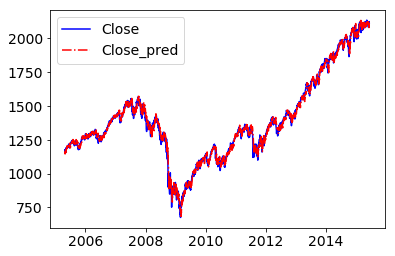

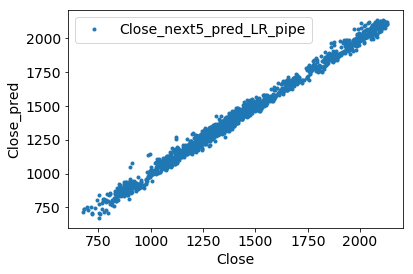

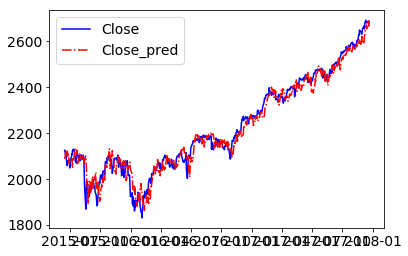

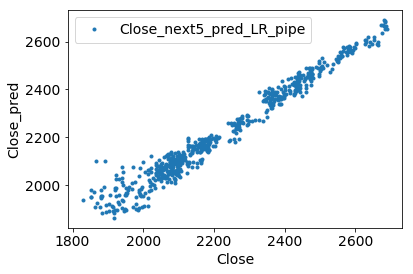

In [53]:
# Predict the last day's closing price using Linear regression with scaled features.
scaler = MinMaxScaler()
# scaler = StandardScaler()
print('Scaled Linear Regression:')
LR_pipeline = make_pipeline(scaler, LinearRegression())
LR_pipeline.fit(X_train, y_train)
target_next_pred = target_next+'_pred_LR_pipe'
y_train_df[target_next_pred] = LR_pipeline.predict(X_train)
y_test_df[target_next_pred] = LR_pipeline.predict(X_test)
plot_target_pred(y_train_df[target_next], y_train_df[target_next_pred], target)
plot_target_pred(y_test_df[target_next], y_test_df[target_next_pred], target)
MAE_train_LR_pipe = metrics.mean_absolute_error(y_train_df[target_next], y_train_df[target_next_pred])
MAE_test_LR_pipe = metrics.mean_absolute_error(y_test_df[target_next], y_test_df[target_next_pred])


Scaled Linear Regression:


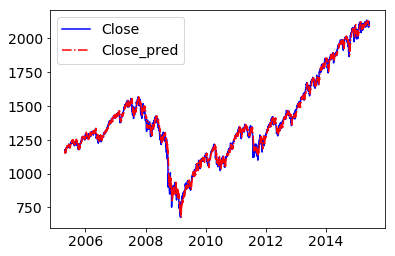

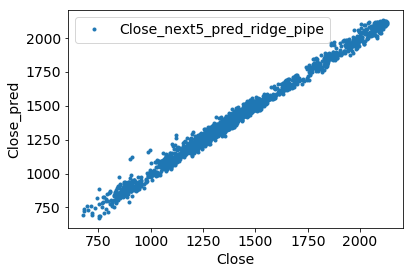

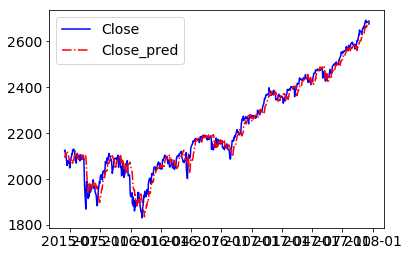

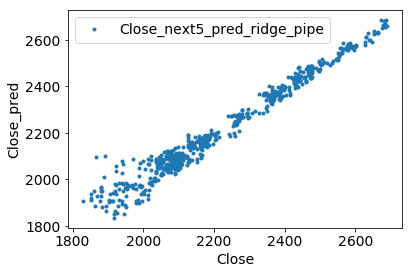

In [55]:
# Predict the last day's closing price using ridge regression and scaled features.
print('Scaled Ridge Regression:')
ridge_pipeline = make_pipeline(scaler, Ridge())
ridge_pipeline.fit(X_train, y_train)
target_next_pred = target_next+'_pred_ridge_pipe'
y_train_df[target_next_pred] = ridge_pipeline.predict(X_train)
y_test_df[target_next_pred] = ridge_pipeline.predict(X_test)
plot_target_pred(y_train_df[target_next], y_train_df[target_next_pred], target)
plot_target_pred(y_test_df[target_next], y_test_df[target_next_pred], target)
MAE_train_ridge_pipe = metrics.mean_absolute_error(y_train_df[target_next], y_train_df[target_next_pred])
MAE_test_ridge_pipe = metrics.mean_absolute_error(y_test_df[target_next], y_test_df[target_next_pred])


Scaled Lasso Regression:


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


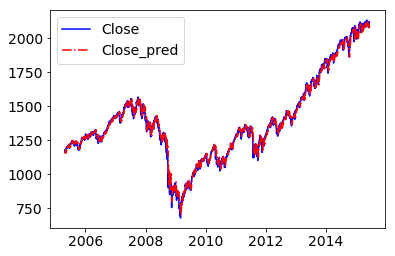

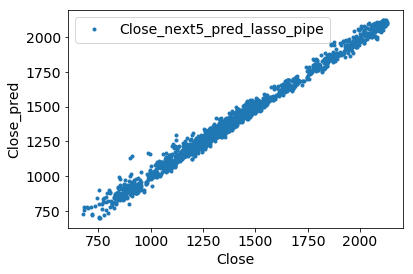

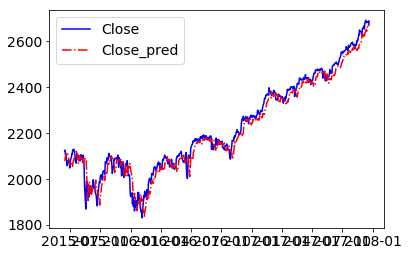

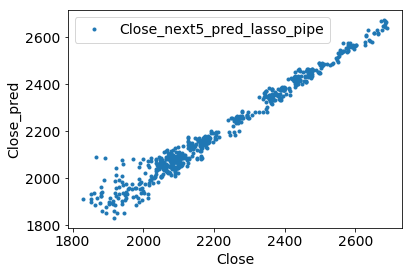

In [56]:
# Predict the last day's closing price using Lasso regression and scaled features.
print('Scaled Lasso Regression:')
lasso_pipeline = make_pipeline(scaler, Lasso())
lasso_pipeline.fit(X_train, y_train)
target_next_pred = target_next+'_pred_lasso_pipe'
y_train_df[target_next_pred] = lasso_pipeline.predict(X_train)
y_test_df[target_next_pred] =lasso_pipeline.predict(X_test)
plot_target_pred(y_train_df[target_next], y_train_df[target_next_pred], target)
plot_target_pred(y_test_df[target_next], y_test_df[target_next_pred], target)
MAE_train_lasso_pipe = metrics.mean_absolute_error(y_train_df[target_next], y_train_df[target_next_pred])
MAE_test_lasso_pipe = metrics.mean_absolute_error(y_test_df[target_next], y_test_df[target_next_pred])
